<a href="https://colab.research.google.com/github/nickwinters1/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Global_Climate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 11.5MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.__version__

'0.9.0'

In [96]:
from google.colab import files
uploaded = files.upload()

Saving GLB.Ts+dSST.csv to GLB.Ts+dSST.csv


Here is the link to the Global Mean Temperature page on Nasas website: https://data.giss.nasa.gov/gistemp/

Here is the link to the CSV file I used: https://data.giss.nasa.gov/gistemp/tabledata_v3/GLB.Ts+dSST.csv

In [97]:
global_mean_temperature = pd.read_csv('GLB.Ts+dSST.csv', header=None, names=['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'J_D', 'D_N', 'DJF', 'MAM', 'JJA', 'SON'], na_values=["?"])
global_mean_temperature.head()
#We were able to load the data, but we need to get rid of the first two rows since they aren't useful and we also only need data for the years 2008 through 2018

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J_D,D_N,DJF,MAM,JJA,SON
0,Land-Ocean: Global Means,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
2,1880,-.30,-.19,-.12,-.20,-.12,-.24,-.21,-.10,-.17,-.24,-.21,-.23,-.19,***,***,-.15,-.18,-.20
3,1881,-.16,-.18,.03,.03,.01,-.21,-.07,-.03,-.15,-.21,-.23,-.12,-.11,-.12,-.19,.03,-.11,-.19
4,1882,.13,.14,.03,-.20,-.17,-.27,-.21,-.06,-.11,-.25,-.17,-.25,-.12,-.10,.05,-.11,-.18,-.18


In [98]:
global_mean_temperature = global_mean_temperature.iloc[130:]
global_mean_temperature
#Now that we have the first two rows removed along with the other rows we will not be using, now we need to remove all uneccesary columns. All we want in the dataframe is the year, and the yearly mean (J_D) 

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J_D,D_N,DJF,MAM,JJA,SON
130,2008,.23,.34,.73,.51,.47,.46,.59,.44,.63,.63,.65,.53,.52,.51,.34,.57,.49,.64
131,2009,.61,.50,.52,.59,.64,.65,.70,.66,.68,.63,.76,.65,.63,.62,.55,.58,.67,.69
132,2010,.73,.79,.92,.85,.74,.62,.59,.63,.59,.69,.77,.46,.70,.71,.73,.83,.61,.68
133,2011,.49,.51,.62,.62,.51,.58,.71,.72,.55,.63,.56,.53,.59,.58,.49,.58,.67,.58
134,2012,.45,.48,.56,.68,.75,.63,.53,.62,.72,.75,.73,.52,.62,.62,.49,.66,.59,.73
135,2013,.67,.55,.66,.53,.58,.65,.58,.67,.77,.67,.78,.65,.65,.64,.58,.59,.63,.74
136,2014,.73,.52,.76,.77,.85,.67,.56,.81,.88,.81,.66,.78,.73,.72,.63,.79,.68,.79
137,2015,.81,.87,.90,.75,.75,.79,.72,.78,.82,1.07,1.03,1.11,.87,.84,.82,.80,.76,.97
138,2016,1.16,1.34,1.31,1.07,.91,.78,.82,1.01,.88,.90,.91,.83,.99,1.02,1.20,1.10,.87,.90
139,2017,.98,1.13,1.13,.93,.90,.70,.83,.87,.76,.88,.86,.89,.91,.90,.98,.99,.80,.83


In [99]:
#global_mean_temperature.drop(columns=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'D_N', 'DJF', 'MAM', 'JJA', 'SON'])
#del global_mean_temperature['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'D_N', 'DJF', 'MAM', 'JJA', 'SON']
#global_mean_temperature.head()
global_mean_temperature = pd.DataFrame(
    {
        "Year": [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
        "Temperature_Mean": [.52,.63,.70,.59,.62,.65,.73,.87,.99,.91,.83]
    }
)
global_mean_temperature
#Now we have a dataframe with the year and the global temperature mean

,Year,Temperature_Mean
0,2008,0.52
1,2009,0.63
2,2010,0.70
3,2011,0.59
4,2012,0.62
5,2013,0.65
6,2014,0.73
7,2015,0.87
8,2016,0.99
9,2017,0.91


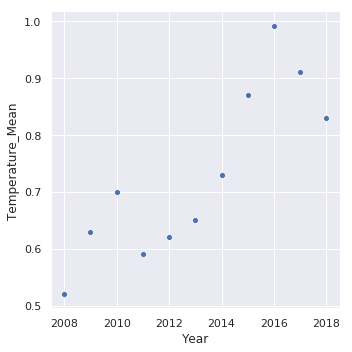

In [100]:
sns.relplot('Year','Temperature_Mean', data=global_mean_temperature, alpha=1.0)
#let's plot the data to show the yearly temperature mean from 2008 to 2018

As you can see the global mean temperature has been steadily increasing, but in 2017 in began to decrease!

In [101]:
global_mean_carbon = pd.DataFrame(
    {
        "Year": [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
        "Carbon_Mean": [384.78,386.29,388.57,390.45,392.46,395.19,397.12,399.41,402.86,405.00,407.40]
    }
)
global_mean_carbon
#We are going to make a new dataframe with year and the yearly carbon mean

,Year,Carbon_Mean
0,2008,384.78
1,2009,386.29
2,2010,388.57
3,2011,390.45
4,2012,392.46
5,2013,395.19
6,2014,397.12
7,2015,399.41
8,2016,402.86
9,2017,405.00


Here is the link to the Carbon page: https://www.esrl.noaa.gov/gmd/ccgg/trends/gl_data.html

Here is a link to the carbon mean data I used: ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_annmean_gl.txt

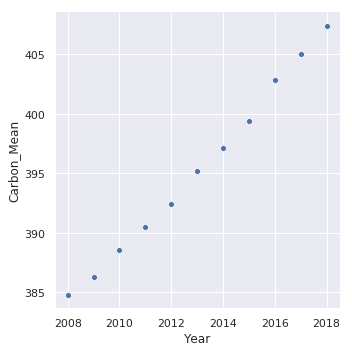

In [102]:
sns.relplot('Year','Carbon_Mean', data=global_mean_carbon, alpha=1.0)
#We are going to plot the dataframe to show the yearly carbon mean

As you can see there is a steady increase in the global carbon mean each year

In [103]:
global_mean_carbon_and_temperature = pd.DataFrame(
    {
        "Year": [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018],
        "Carbon_Mean": [384.78,386.29,388.57,390.45,392.46,395.19,397.12,399.41,402.86,405.00,407.40],
        "Temperature_Mean": [.64,.78,.90,.78,.76,.81,.87,.97,1.25,1.14,1.06]
    }
)
global_mean_carbon_and_temperature
#Let's make a dataframe that has the year, the global carbon annual mean, and the global temperature annual mean

,Year,Carbon_Mean,Temperature_Mean
0,2008,384.78,0.64
1,2009,386.29,0.78
2,2010,388.57,0.90
3,2011,390.45,0.78
4,2012,392.46,0.76
5,2013,395.19,0.81
6,2014,397.12,0.87
7,2015,399.41,0.97
8,2016,402.86,1.25
9,2017,405.00,1.14


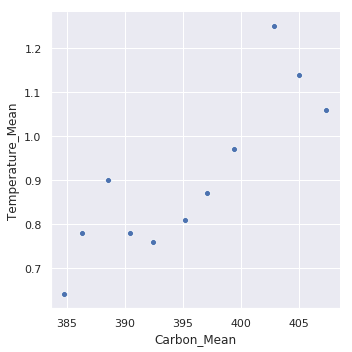

In [104]:
sns.relplot('Carbon_Mean','Temperature_Mean', data=global_mean_carbon_and_temperature, alpha=1.0)
#We are now comparing the carbon mean (X Axis), to the temperature mean (Y Axis)

As you can see there is a increase in temperature mean as the carbon mean increases

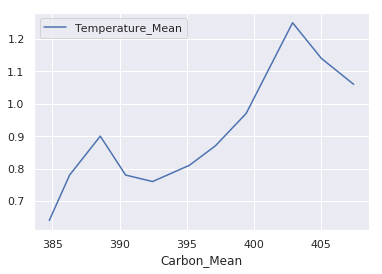

In [105]:
lines = global_mean_carbon_and_temperature.plot.line(x='Carbon_Mean', y='Temperature_Mean')

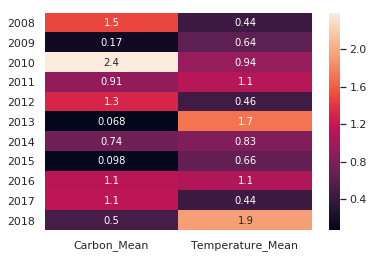

In [106]:
import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

Index= ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
Cols = ['Carbon_Mean', 'Temperature_Mean']
global_mean_carbon_and_temperature = DataFrame(abs(np.random.randn(11, 2)), index=Index, columns=Cols)

sns.heatmap(global_mean_carbon_and_temperature, annot=True)


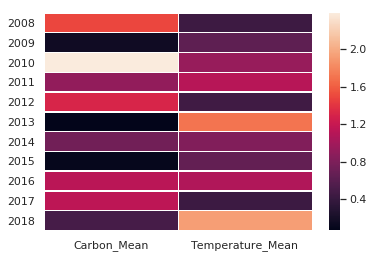

In [109]:
ax = sns.heatmap(global_mean_carbon_and_temperature, linewidths=.5)